In [1]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# 데이터셋을 다운로드합니다.
dataset, info = tfds.load('tf_flowers', split='train', as_supervised=True, with_info=True)

In [3]:
# 데이터셋 정보 출력
print(info)

tfds.core.DatasetInfo(
    name='tf_flowers',
    full_name='tf_flowers/3.0.1',
    description="""
    A large set of images of flowers
    """,
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    data_path='/aiffel/tensorflow_datasets/tf_flowers/3.0.1',
    download_size=218.21 MiB,
    dataset_size=221.83 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=5),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=3670, num_shards=2>,
    },
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
)


In [4]:
# 데이터셋 샘플 확인
for image, label in dataset.take(5):
    # 이미지와 라벨을 사용하여 필요한 작업 수행
    print("Image shape:", image.shape)
    print("Label:", label)

Image shape: (333, 500, 3)
Label: tf.Tensor(2, shape=(), dtype=int64)
Image shape: (212, 320, 3)
Label: tf.Tensor(3, shape=(), dtype=int64)
Image shape: (240, 320, 3)
Label: tf.Tensor(3, shape=(), dtype=int64)
Image shape: (240, 320, 3)
Label: tf.Tensor(4, shape=(), dtype=int64)
Image shape: (317, 500, 3)
Label: tf.Tensor(3, shape=(), dtype=int64)


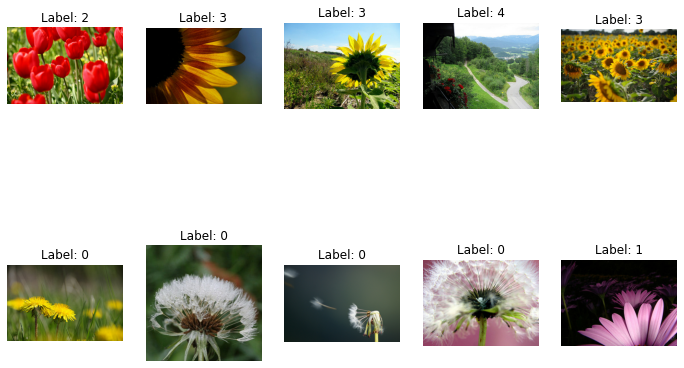

In [5]:
# 데이터셋에서 앞에서 10장의 이미지와 레이블을 가져옵니다.
images = []
labels = []
for image, label in dataset.take(10):
    images.append(image)
    labels.append(label)

# 이미지를 시각화합니다.
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i].numpy())
    plt.title(f"Label: {labels[i].numpy()}")
    plt.axis('off')
plt.show()

In [6]:
# Load the dataset and get the dataset information
dataset, info = tfds.load('tf_flowers', split='train', as_supervised=True, with_info=True)

# 데이터셋의 이미지 개수를 확인합니다.
num_images = info.splits['train'].num_examples

# 데이터셋의 레이블 개수를 확인합니다.
num_labels = info.features['label'].num_classes

# 클래스 레이블 분포를 확인합니다.
label_counts = [0] * num_labels
for _, label in dataset:
    label_counts[label.numpy()] += 1

# 이미지 크기를 확인합니다.
sample_image, _ = next(iter(dataset))
image_height, image_width, image_channels = sample_image.shape

# 결과 출력
print(f"이미지 개수: {num_images}")
print(f"레이블 개수: {num_labels}")
print("클래스 레이블 분포:")
for i in range(num_labels):
    print(f"Label {i}: {label_counts[i]} 개")

print(f"이미지 크기: {image_height} x {image_width} 픽셀, 채널: {image_channels}")

이미지 개수: 3670
레이블 개수: 5
클래스 레이블 분포:
Label 0: 898 개
Label 1: 633 개
Label 2: 799 개
Label 3: 699 개
Label 4: 641 개
이미지 크기: 333 x 500 픽셀, 채널: 3


Image shape: (224, 224, 3)
Label: tf.Tensor(2, shape=(), dtype=int64)
Image shape: (224, 224, 3)
Label: tf.Tensor(0, shape=(), dtype=int64)
Image shape: (224, 224, 3)
Label: tf.Tensor(2, shape=(), dtype=int64)
Image shape: (224, 224, 3)
Label: tf.Tensor(1, shape=(), dtype=int64)
Image shape: (224, 224, 3)
Label: tf.Tensor(4, shape=(), dtype=int64)


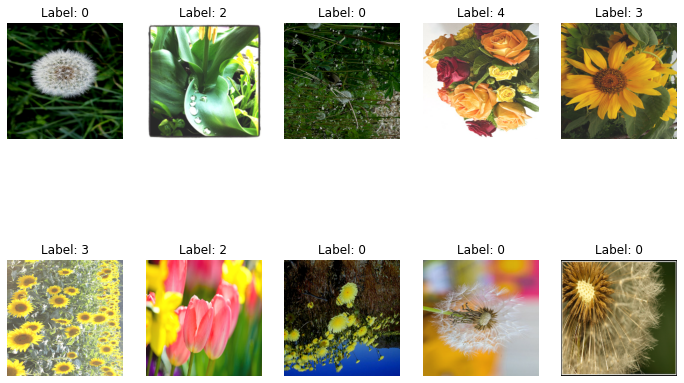

이미지 개수: 3670
레이블 개수: 5
클래스 레이블 분포:
Label 0: 898 개
Label 1: 633 개
Label 2: 799 개
Label 3: 699 개
Label 4: 641 개
이미지 크기: 224 x 224 픽셀, 채널: 3


In [17]:

# Function to resize images
def preprocess_image(image, label):
    image = tf.image.resize(image, (224, 224))
    return image, label

# Apply the preprocessing function to the dataset
dataset = dataset.map(preprocess_image)

# 데이터셋 샘플 확인
for image, label in dataset.take(5):
    # 이미지와 라벨을 사용하여 필요한 작업 수행
    print("Image shape:", image.shape)
    print("Label:", label)

# Visualize the first 10 resized images
images = []
labels = []
for image, label in dataset.take(10):
    images.append(image)
    labels.append(label)

# 이미지를 시각화합니다.
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i].numpy())
    plt.title(f"Label: {labels[i].numpy()}")
    plt.axis('off')
plt.show()

# Updated dataset information
num_images = info.splits['train'].num_examples
num_labels = info.features['label'].num_classes
label_counts = [0] * num_labels
for _, label in dataset:
    label_counts[label.numpy()] += 1
sample_image, _ = next(iter(dataset))
image_height, image_width, image_channels = sample_image.shape

# 결과 출력
print(f"이미지 개수: {num_images}")
print(f"레이블 개수: {num_labels}")
print("클래스 레이블 분포:")
for i in range(num_labels):
    print(f"Label {i}: {label_counts[i]} 개")
print(f"이미지 크기: {image_height} x {image_width} 픽셀, 채널: {image_channels}")

In [24]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint


# Load the dataset and get the dataset information
dataset, info = tfds.load('tf_flowers', split='train', as_supervised=True, with_info=True)

# Function to resize images and normalize pixel values
def preprocess_image(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.keras.applications.vgg16.preprocess_input(image)
    return image, label

# Apply the preprocessing function to the dataset
dataset = dataset.map(preprocess_image)

# Split the dataset into train, validation, and test sets
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

num_examples = info.splits['train'].num_examples
num_train_examples = int(train_ratio * num_examples)
num_val_examples = int(val_ratio * num_examples)
num_test_examples = int(test_ratio * num_examples)

train_dataset = dataset.take(num_train_examples)
val_dataset = dataset.skip(num_train_examples).take(num_val_examples)
test_dataset = dataset.skip(num_train_examples + num_val_examples).take(num_test_examples)

# Shuffle and batch the datasets
batch_size = 32

train_batches = train_dataset.shuffle(num_train_examples).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
val_batches = val_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
test_batches = test_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

# Load the pre-trained VGG16 model (without the top classification layer)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add a custom classification head with dropout regularization
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout layer with a dropout rate of 0.5
predictions = Dense(num_labels, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with a custom learning rate
learning_rate = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with transfer learning
epochs = 5

# Adding model checkpoint callback
checkpoint_filepath = 'vgg16_flowers_best_model.h5'
checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

history = model.fit(train_batches, validation_data=val_batches, epochs=epochs, callbacks=[checkpoint])

# Unfreeze the last few layers for fine-tuning
for layer in model.layers[-10:]:
    layer.trainable = True

# Compile the model again for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with fine-tuning
fine_tune_epochs = 10

# Load the best model checkpoint
model.load_weights(checkpoint_filepath)

# Train the model with fine-tuning and the checkpoint
history_fine_tune = model.fit(train_batches, validation_data=val_batches, epochs=fine_tune_epochs, callbacks=[checkpoint])

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_batches)
print(f"Test accuracy: {test_accuracy}")

Epoch 1/5
69/69 [==============================] - 24s 259ms/step - loss: 5.1399 - accuracy: 0.6281 - val_loss: 1.5201 - val_accuracy: 0.8079

Epoch 00001: val_accuracy improved from -inf to 0.80790, saving model to vgg16_flowers_best_model.h5
Epoch 2/5
69/69 [==============================] - 22s 249ms/step - loss: 0.7510 - accuracy: 0.8678 - val_loss: 1.1283 - val_accuracy: 0.8311

Epoch 00002: val_accuracy improved from 0.80790 to 0.83106, saving model to vgg16_flowers_best_model.h5
Epoch 3/5
69/69 [==============================] - 21s 243ms/step - loss: 0.2818 - accuracy: 0.9373 - val_loss: 1.1900 - val_accuracy: 0.8106

Epoch 00003: val_accuracy did not improve from 0.83106
Epoch 4/5
69/69 [==============================] - 22s 247ms/step - loss: 0.1958 - accuracy: 0.9496 - val_loss: 1.1263 - val_accuracy: 0.8229

Epoch 00004: val_accuracy did not improve from 0.83106
Epoch 5/5
69/69 [==============================] - 22s 252ms/step - loss: 0.1533 - accuracy: 0.9632 - val_loss: 1

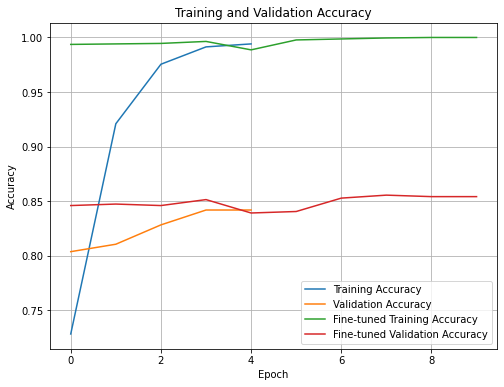

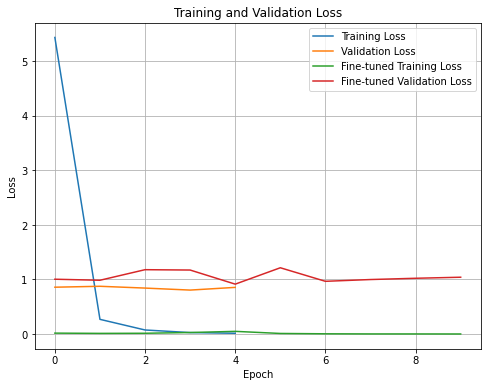

In [21]:

# Plot the training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history_fine_tune.history['accuracy'], label='Fine-tuned Training Accuracy')
plt.plot(history_fine_tune.history['val_accuracy'], label='Fine-tuned Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history_fine_tune.history['loss'], label='Fine-tuned Training Loss')
plt.plot(history_fine_tune.history['val_loss'], label='Fine-tuned Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()